质量好坏预测
1、基于data class raw.csv数据，根据高斯分布概率密度函数，寻找异常点并剔除
2、基于data class processed.csv数据进行PCA处理，确定重要数据维度及成分
3、完成数据分离，数据分离参数:random state=4 test size=0.4
4、建立KNN模型完成分类，n neighbors取10，计算分类准确率，可视化分类边界
5、计算测试数据集对应的混淆矩阵算准确率、召回率、特异度、精确率F1分数
6、尝试不同的n neighbors(1-20),计算6其在训练数据集、测试数据集上的准确率并作图

In [7]:
#load data
import pandas as pd 
import numpy as np 

data = pd.read_csv('train.csv')
data.head()

,x1,x2,y
0,3.745401,0.314292,0
1,9.507143,6.364104,1
2,7.319939,3.143560,1
3,5.986585,5.085707,1
4,1.560186,9.075665,1


In [8]:
#define x and y
x = data.drop(['y'], axis=1)
y = data.loc[:, 'y']
print(y)

0     0
1     1
2     1
3     1
4     1
     ..
95    0
96    1
97    1
98    0
99    0
Name: y, Length: 100, dtype: int64


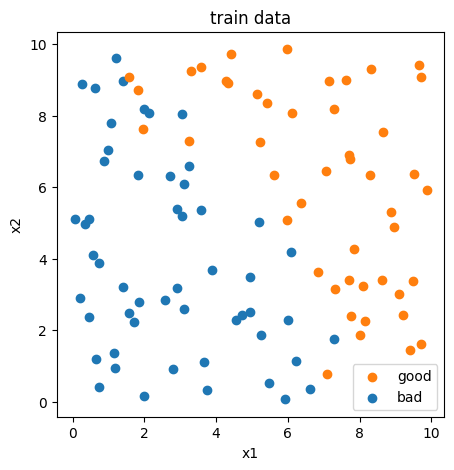

In [9]:
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(5,5))
bad = plt.scatter(x.loc[:, 'x1'][y==0], x.loc[:, 'x2'][y==0])
good = plt.scatter(x.loc[:, 'x1'][y==1], x.loc[:, 'x2'][y==1])
plt.legend((good, bad), ('good', 'bad'))
plt.title('train data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [10]:
#
from sklearn.covariance import EllipticEnvelope
ad_model = EllipticEnvelope()
ad_model.fit(x[y==0])
y_predict_bad = ad_model.predict(x[y==0])
print(y_predict_bad)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1
  1  1  1  1  1]


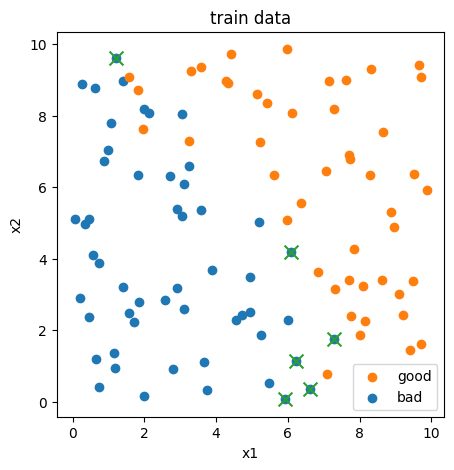

In [12]:
fig2 = plt.figure(figsize=(5,5))
bad = plt.scatter(x.loc[:, 'x1'][y==0], x.loc[:, 'x2'][y==0])
good = plt.scatter(x.loc[:, 'x1'][y==1], x.loc[:, 'x2'][y==1])
plt.scatter(x.loc[:, 'x1'][y==0][y_predict_bad==-1], x.loc[:, 'x2'][y==0][y_predict_bad==-1], marker='x',s=100)
plt.legend((good, bad), ('good', 'bad'))
plt.title('train data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

校验数据，并删除

In [13]:
#pca
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x_norm = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)

x_reduced = pca.fit_transform(x_norm)
var_ratio = pca.explained_variance_ratio_
print(var_ratio)

[0.51701625 0.48298375]


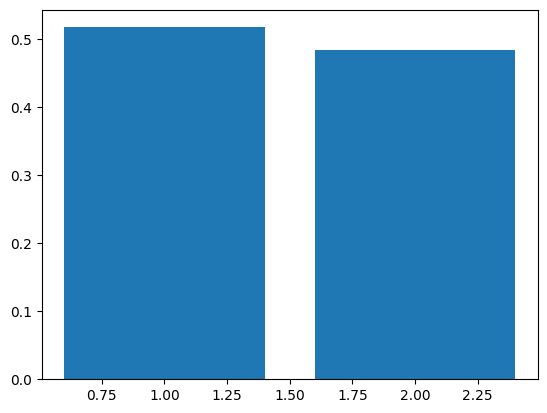

In [14]:
fig4 = plt.figure()
plt.bar([1,2], var_ratio)
plt.show()

In [16]:
#数据分离
from numpy import test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=4, test_size=0.4)
print(x_train.shape,x_test.shape,x.shape)

(60, 2) (40, 2) (100, 2)
